In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import dendrogram, linkage

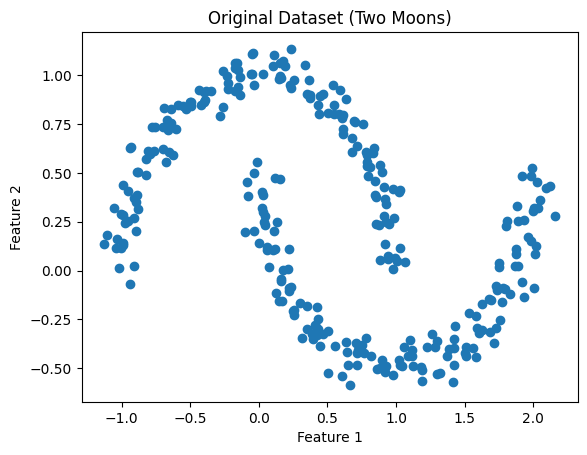

In [3]:
# synthetic dataset Creation
X, y = make_moons(n_samples=300, noise=0.06, random_state=42)

plt.scatter(X[:,0], X[:,1])
plt.title("Original Dataset (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

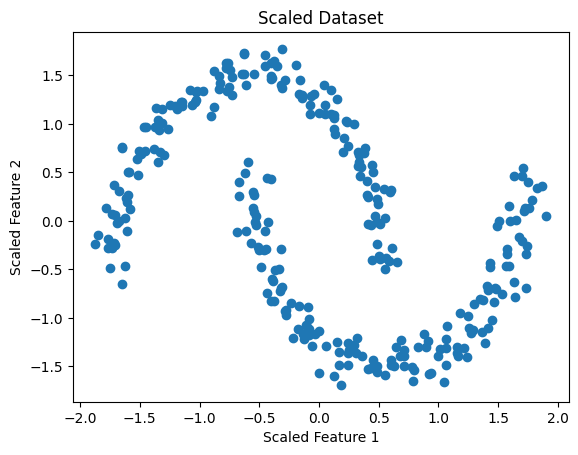

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.title("Scaled Dataset")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()

In [11]:
# DBSCAN implementation
dbscan = DBSCAN(eps=0.2, min_samples=3)

db_labels = dbscan.fit_predict(X_scaled)

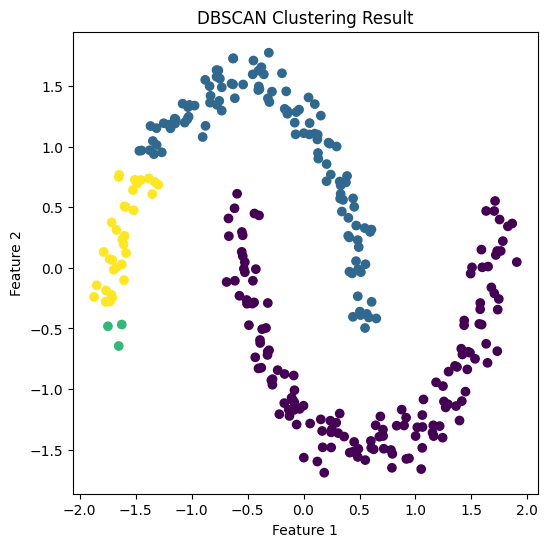

Each color represents a cluster
Label -1 represents noise points

Unique cluster labels: [0 1 2 3]


In [12]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=db_labels, cmap='viridis')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print('Each color represents a cluster')
print('Label -1 represents noise points\n')
print("Unique cluster labels:", np.unique(db_labels)) # DBSCAN automatically decides the number of clusters

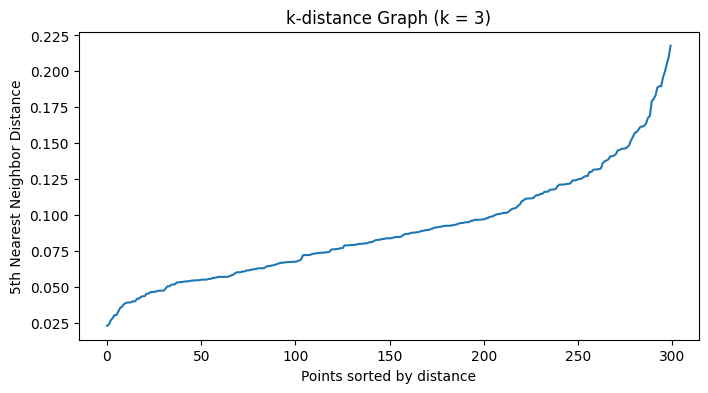

In [13]:
# choosing eps using k-distance Plot
neighbors = NearestNeighbors(n_neighbors=3)
neighbours_fit = neighbors.fit(X_scaled)
distances, indices = neighbours_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,2])

plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-distance Graph (k = 3)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

### How to Read the k-distance Graph
- Look for a sharp change (elbow)
- The y-value at the elbow is a good choice for `eps`

In [14]:
# hierarchical clustering
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

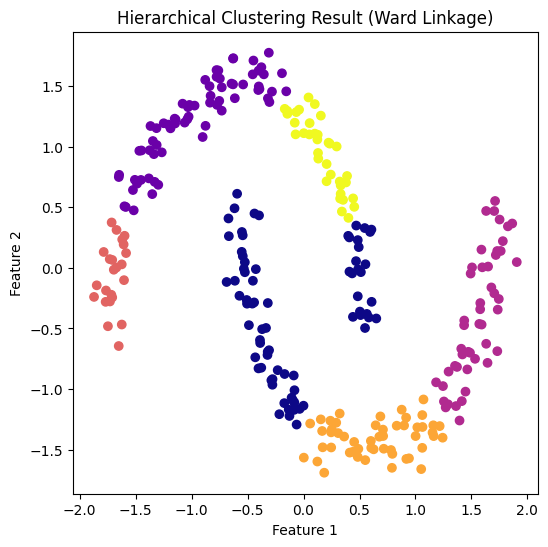

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

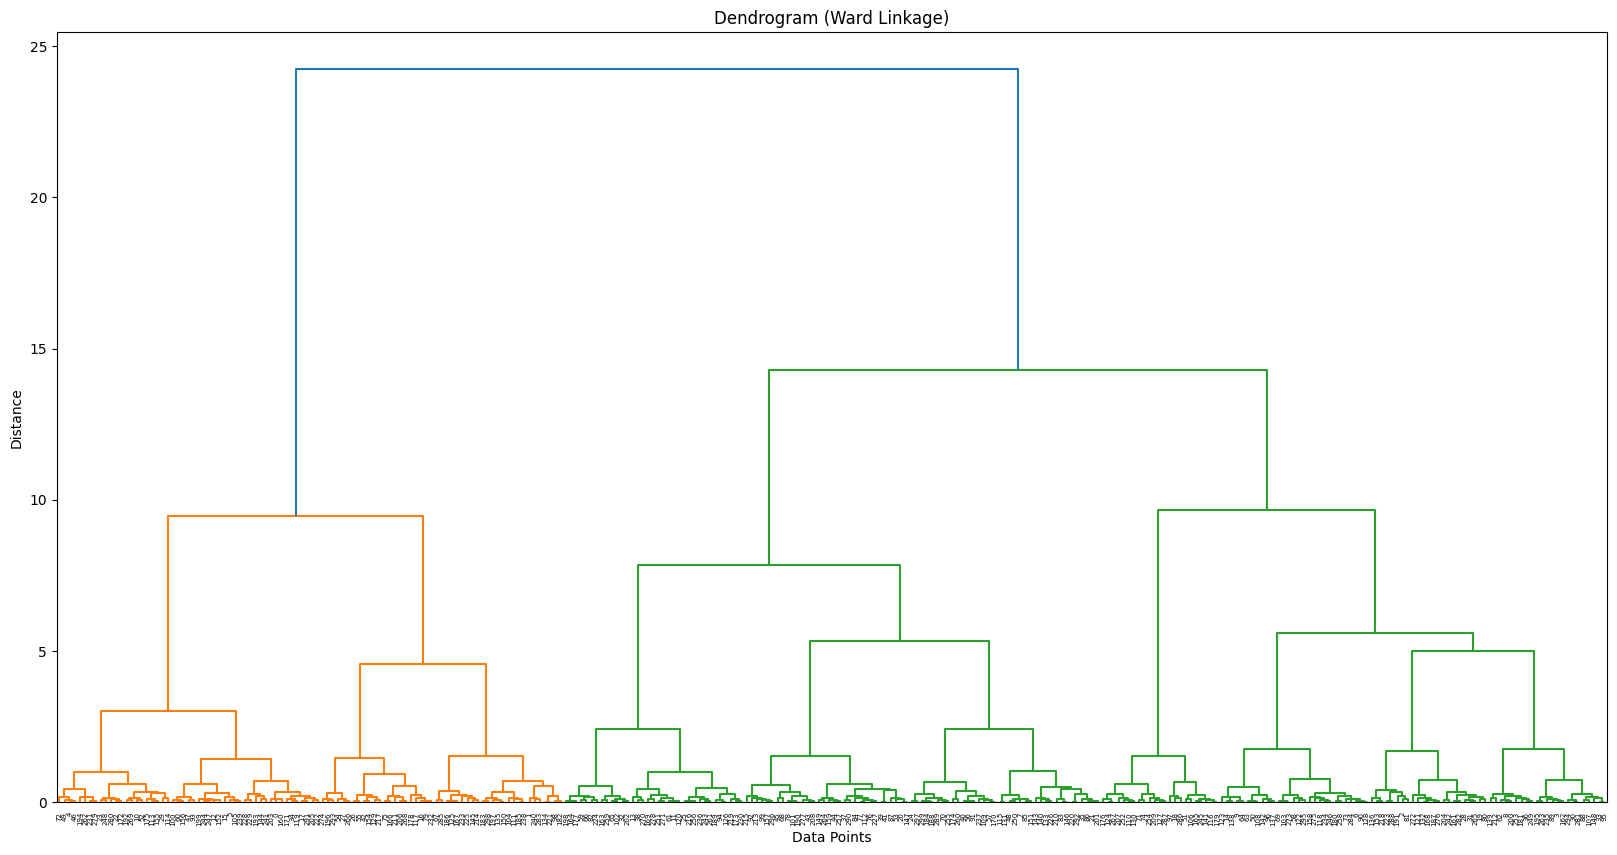

In [17]:
# dendrogram Construction
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(20,10))
dendrogram(linked)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()